# Lecture 08: Multi-reaction equilibria

This lecture introduces solutions for multi-reaction equilibria.

In [1]:
import numpy as np
import scipy.optimize as opt 
import matplotlib.pyplot as plt

## Example 1

The two reactions below represent possible products that can form in the alkylation of isobutane with 1-butene.  This is actually a really important industrial process for converting relatively low-value butane into high octane gasoline additives (triptane, also called iso-octante).

\begin{align}
    (1) \qquad \text{isobutane (g)} + \text{1-butene (g)} &\leftrightarrow \text{2,2,3-trimethylpentane (g)} \\
    (2) \qquad \text{isobutane (g)} + \text{1-butene (g)} &\leftrightarrow \text{2,2,4-trimethylpentane (g)} \\
\end{align}

It is common in reactor design that we represent reaction systems with generic notation to simplify labelling.  We will represent these reactions more succinctly as:

\begin{align}
    (1) \qquad \text{A (g)} + \text{B (g)} &\leftrightarrow \text{C (g)} \\ 
    (2) \qquad \text{A (g)} + \text{B (g)} &\leftrightarrow \text{D (g)} \\
\end{align}

Both reactions are occurring in a system in which temperature is constant at 400K, and pressure is constant at 1875.16 Torr. The system is initially charged with an equimolar quantity of isobutane (A) and 1-butene (B).  Under these conditions, you may assume that all species are in the gas phase, and that all gases behave ideally. The following thermodynamic data is available for the two reactions as written at 1 bar and 400K:

\begin{align}
    {\Delta G}^\circ_1 &= -3.72 \,\frac{\textrm{kcal}}{\textrm{mol}} \\
    {\Delta G}^\circ_2 &= -4.49 \,\frac{\textrm{kcal}}{\textrm{mol}} \\
\end{align}

Calculate the equilibrium composition of this mixture.

### Developing the Solution

We are trying to determine the system composition at chemical equilibrium from thermodynamic data.  As usual, we do this by considering the following relationship:		

$$\exp\left(\frac{-{\Delta G}^\circ_i}{RT}\right) = K_i = \prod_{j = 1}^{N_S}a_j^{\nu_{i,j}} \label{eq1}\tag{1}$$

You'll notice a very slight modification to this in that I've added an index, $i$, which corresponds to the reaction number (here, 1 or 2).  We developed this equation in consideration of a single reaction.  When we have multiple reactions, this equation will apply to each and every reaction independently.  So we basically end up writing a copy of that equation for every reaction that is happening in our system.  

With that in mind, to determine the equilibrium composition of the mixture, we need to solve the following two equations simultaneously:

\begin{align}
    \exp\left(\frac{-{\Delta G}^\circ_1}{RT}\right) &= K_1 = \frac{a_C}{a_A a_B} \label{eq2}\tag{2}\\
    \\
    \exp\left(\frac{-{\Delta G}^\circ_2}{RT}\right) &= K_2 = \frac{a_D}{a_A a_B} \label{eq3}\tag{3}\\
\end{align}
    

### Calculating thermodynamic equilibrium constants

First, let's figure out the values of our equilibrium constants.  These need to be calculated from the standard state Gibbs free energy.  Since this is a gas phase reaction, we define these at:

1. T = Reaction Temperature (Here, 400K)
2. P = 1 bar 
3. Pure species 

If we look at the Gibbs free energy data given above, values are given at exactly these conditions, so we can calculate the appropriate equilibrium constants directly using:

$$K_i = \exp\left(\frac{-{\Delta G}^\circ_i}{RT}\right) \label{eq4}\tag{4}$$

In [2]:
DG1 = -3.72      #kcal/mol
DG2 = -4.49      #kcal/mol
R   = 1.987e-3   #kcal/mol/K
T   = 400        #K

K1  = np.exp(-DG1/R/T)
K2  = np.exp(-DG2/R/T)

print(f'A T = {T:0.0f}K, K1 = {K1:4.1f} and K2 = {K2:4.1f}')

A T = 400K, K1 = 107.8 and K2 = 284.1


### Now we work on the composition and pressure dependencies...

Now that we know the values of the equilibrium constants, we now have to fill out the right hand side of these equations, i.e.:

\begin{align}
    K_1 &= \frac{a_C}{a_A a_B} \label{eq5}\tag{5}\\
    \\
    K_2 &= \frac{a_D}{a_A a_B} \label{eq6}\tag{6}\\
\end{align}

We do this exactly the same way as we have for the ammonia synthesis problem.  As usual, activities are defined as:

$$a_j = \frac{\hat{f}_j}{f_j^\circ} \label{eq7}\tag{7}$$

Note that activities are *species* specific, so it doesn't matter that we have many reactions, we always define activities this way. The numerator is the fugacity of species $j$ under reaction conditions (T = 400K, P = 1875.16 Torr, $\chi_j$ = ?). The denominator is the fugacity of species $j$ in its reference state. Our reference state for gas-phase species is a pure species at 1 bar and the reaction temperature (T = 400K). Our convention for calculating fugacities of gases in a mixture uses the Lewis Randall rule.  With these things in mind, formally, we have:

$$a_j = \frac{y_j \phi_j P}{y_j^\circ \phi_j^\circ  P^\circ} \label{eq8}\tag{8}$$

Looking at the numerator, we are operating this reactor at 1875.16 Torr.  This is about 2.5 bar, so it is reasonable to say that the fugacity coefficient for species j under reaction conditions, $\phi_j$ is 1. Looking at the denominator, the reference state is a pure species, so $y_j^\circ = 1$.  Further, that pure species is at 1 bar, so $\phi_j^\circ = 1$

This gives the usual result for low pressure gases:

$$a_j = \frac{y_j P}{P^\circ} \label{eq9}\tag{9}$$

Now we apply this equation to all of the species participating in the reaction.  Notice that I'm still retaining $P$ and $P^\circ$ in my solution.  This helps me to keep it general, and to make sure that I take care to be dimensionally consistent.

If we substitute these activity definitions into our two equations that we're trying to solve, we find:

\begin{align}
    K_1 = \frac{\left(\frac{y_C P}{P^\circ}\right)}{\left(\frac{y_A P}{P^\circ}\right) \left(\frac{y_B P}{P^\circ}\right)} \label{eq10}\tag{10}\\
    \\
    K_2 = \frac{\left(\frac{y_D P}{P^\circ}\right)}{\left(\frac{y_A P}{P^\circ}\right) \left(\frac{y_B P}{P^\circ}\right)} \label{eq11}\tag{11}\\
\end{align}

In other words, there are 2 equations and 4 unknowns here ($y_A$, $y_B$, $y_C$, $y_D$).  To solve this, we now express each mole fraction in terms of the number of moles of species as usual:

$$y_j = \frac{N_j}{\sum N_j} \label{eq12}\tag{12}$$

We express each of the molar quantities as functions of extents and organize the data in a mole table:

|Species   |In   |Change                                 |End                                       |
|:---------|:---:|:-------------------------------------:|:----------------------------------------:|
| A        |NA0  |- 1$\varepsilon_1$ - 1$\varepsilon_2$  |NA0 - 1$\varepsilon_1$ - 1$\varepsilon_2$ | 
| B        |NB0  |- 1$\varepsilon_1$ - 1$\varepsilon_2$  |NB0 - 1$\varepsilon_1$ - 1$\varepsilon_2$ |
| C        |NC0  |+ 1$\varepsilon_1$ + 0$\varepsilon_2$  |NC0 + 1$\varepsilon_1$ + 0$\varepsilon_2$ |
| D        |ND0  |+ 0$\varepsilon_1$ + 1$\varepsilon_2$  |ND0 + 0$\varepsilon_1$ + 1$\varepsilon_2$ |
| Total    |NT0  |- 1$\varepsilon_1$ - 1$\varepsilon_2$  |NT0 - 1$\varepsilon_1$ - 1$\varepsilon_2$ |


Now that each of these molar quantities are defined as functions of $\varepsilon_1$ and $\varepsilon_2$, it is just a matter of substituting those into mole fractions, then into activities, then into the equilibrium equations...that gives us two equations:

\begin{align}
    K_1 &= \frac{a_C}{a_A a_B} \label{eq13}\tag{13}\\
    \\
    K_2 &= \frac{a_D}{a_A a_B} \label{eq14}\tag{14}\\
\end{align}

That are fully described in terms of two unknowns: $\varepsilon_1$ and $\varepsilon_2$.  We can solve this problem using any nonlinear equation solver we like.  Below, I do this by writing an objective function in Python and solving it with scipy.opimize.root.

<div class = "alert alert-block alert-info">
    <b>The only thing left to mention</b>: The problem states that the feed to the reactor is an equimolar quantity of A and B, so we'll set a basis of 1 mole of each species.
    </div>

In [3]:
def EQ1(var):
    
    ex1 = var[0]
    ex2 = var[1]
    
    DG1 = -3.72      #kcal/mol
    DG2 = -4.49      #kcal/mol
    R   = 1.987e-3   #kcal/mol/K
    T   = 400        #K
    P   = 1875.16    #Torr
    P   = P/750      #convert to bar
    P0  = 1          #bar
    NA0 = 1          #mole
    NB0 = 1          #mole
    NC0 = 0          #moles
    ND0 = 0          #moles
    
    NA  = NA0 - ex1 - ex2
    NB  = NB0 - ex1 - ex2
    NC  = NC0 + ex1
    ND  = ND0       + ex2
    
    NT  = NA + NB + NC + ND
    
    yA  = NA/NT
    yB  = NB/NT
    yC  = NC/NT
    yD  = ND/NT

    aA  = yA*P/P0
    aB  = yB*P/P0
    aC  = yC*P/P0
    aD  = yD*P/P0
    
    K1A = aC/aA/aB
    K2A = aD/aA/aB
    
    K1  = np.exp(-DG1/R/T)
    K2  = np.exp(-DG2/R/T)
    
    LHS1 = K1 - K1A
    LHS2 = K2 - K2A
    
    return [LHS1, LHS2]

In [4]:
var0 = np.array([0.2, 0.6])
ans  = opt.root(EQ1, var0)
ans

    fjac: array([[-0.11148605,  0.993766  ],
       [-0.993766  , -0.11148605]])
     fun: array([-4.67537120e-12, -3.69482223e-12])
 message: 'The solution converged.'
    nfev: 38
     qtf: array([ 6.79717625e-09, -9.89365232e-09])
       r: array([-10467.07451254, -10507.37028468,   -949.98482806])
  status: 1
 success: True
       x: array([0.26633549, 0.70173367])

In [5]:
#Now a bit of post processing that solution to get the requested compositions:
e1  = ans.x[0]
e2  = ans.x[1]

NA0 = 1          #mole
NB0 = 1          #mole
NC0 = 0          #moles
ND0 = 0          #moles

NA  = NA0 - e1 - e2
NB  = NB0 - e1 - e2
NC  = NC0 + e1
ND  = ND0      + e2

NT  = NA + NB + NC + ND

yA  = NA/NT
yB  = NB/NT
yC  = NC/NT
yD  = ND/NT

print(f'The mole fractions of A, B, C, and D are {yA:0.3f}, {yB:0.3f}, {yC:0.3f}, and {yD:0.3f}')

The mole fractions of A, B, C, and D are 0.031, 0.031, 0.258, and 0.680


## Example 2

Calculate the equilbrium composition for the system in Equilibrium Example 6 at 1875.16 Torr and 327$^\circ$C (600K); the following information will be useful.  All data obtained for pure gases at 1 bar and 400K.

\begin{align}
    \Delta H^\circ_1  &= -20.1 \,\frac{\textrm{kcal}}{\textrm{mol}}\\
    \Delta H^\circ_2  &= -21.0 \,\frac{\textrm{kcal}}{\textrm{mol}}\\
    \Delta Cp^\circ_1 &= 8.20 \times 10^{-4} \,\frac{\textrm{kcal}}{\textrm{mol K}}\\
    \Delta Cp^\circ_2 &= 1.48 \times 10^{-3} \,\frac{\textrm{kcal}}{\textrm{mol K}}
\end{align}

### Developing the Solution

We've made one small change to the problem:  The reaction temperature.  We know that this will impact the equilibrium constant for both reactions, but it is not yet clear how.  We are not given properties of individual species; however, we are given standard state changes of enthalpy and heat capacity for both reactions.  This is all we need to figure out how each $K$ will change with reaction temperature.

### The van't Hoff Equation

We don't have species enthalpies, entropies, and heat capacities like we had in the ammonia synthesis problem.  Instead, we're given heats of reaction and $\Delta C_p$ values for each reaction.  In this case, we'll use the van't Hoff equation:

$$\frac{d \ln{K}}{dT} = \frac{\Delta H}{RT^2} \label{eq15}\tag{15}$$

This is a separable ODE:

$$d \ln{K} = \frac{\Delta H}{RT^2}dT \label{eq16}\tag{16}$$

We integrate both sides:

$$\int_{\ln{K_0}}^{\ln{K}}d \ln{K} = \int_{T_0}^T\frac{\Delta H}{RT^2}dT \label{eq17}\tag{17}$$

The left hand side is easy:

$$\int_{\ln{K_0}}^{\ln{K}}d \ln{K} = \ln\left(\frac{K}{K_0}\right) \label{eq18}\tag{18}$$

The right hand side requires a bit of work:

$$\int_{T_0}^T\frac{\Delta H(T)}{RT^2}dT \label{eq19}\tag{19}$$

Specifically, the heat of reaction, $\Delta H$, is usually a function of temperature, so we can't integrate with respect to temperature until we specify how $\Delta H$ changes with Temperature.  We do this by recalling that, if we know the $\Delta Cp$ for a reaction, then we can determine the enthalpy change of reaction at any temperature, $T$, as long as we know the heat of reaction at a reference temperature, $H_R$ at $T_R$. Specifically:

$$\Delta H(T) = \Delta H_R + \int_{T_R}^T \Delta C_p dT \label{eq20}\tag{20}$$

This can get messy for complex heat capacity expressions, but in our case, both of the $\Delta C_p$ terms are constants, so, in this case:

$$\Delta H(T) = \Delta H_R + \Delta C_p (T - T_R) \label{eq21}\tag{21}$$

That gets substituted back into the right hand side of the van't Hoff equation:

$$\int_{T_0}^T\frac{\Delta H(T)}{RT^2}dT = \int_{T_0}^T\frac{\Delta H_R + \Delta C_p (T - T_R)}{RT^2}dT \label{eq22}\tag{22}$$

The result of that integral is:

$$\int_{T_0}^T\frac{\Delta H_R + \Delta C_p (T - T_R)}{RT^2}dT = \frac{-(\Delta H_R - \Delta C_p T_R)}{R} \left(\frac{1}{T} - \frac{1}{T_0}\right) + \frac{\Delta C_p}{R} \ln\left(\frac{T}{T_0}\right) \label{eq23}\tag{23}$$

Therefore:

$$\ln\left(\frac{K}{K_0}\right) = \frac{-(\Delta H_R - \Delta C_p T_R)}{R} \left(\frac{1}{T} - \frac{1}{T_0}\right) + \frac{\Delta C_p}{R} \ln\left(\frac{T}{T_0}\right) \label{eq24}\tag{24}$$

Or, more convenient:

$$K = K_0\exp\left[\frac{-(\Delta H_R - \Delta C_p T_R)}{R} \left(\frac{1}{T} - \frac{1}{T_0}\right) + \frac{\Delta C_p}{R} \ln\left(\frac{T}{T_0}\right)\right] \label{eq25}\tag{25}$$

Note that "$K$" is a function of temperature as we've written this.  In other words, once we plug a temperature in on the right hand side, we get the value of the equilibrium constant at that temperature.

Frequently, in this course, we'll have problems where $\Delta C_p \approx 0$.  In those cases, the integrated form of the van't Hoff equation is much simpler:

$$K = K_0\exp\left[\frac{-\Delta H_R}{R} \left(\frac{1}{T} - \frac{1}{T_0}\right)\right] \label{eq26}\tag{26}$$


<div class = "alert alert-block alert-success">
    <b>Now</b>: consider what we are equipped with -- a function that calculates the equilibrium constant at any temperature.  This is exactly what we need to finish this problem!!!!
    </div>

For example, in the plot below, we see how the equilibrium constants for both reactions change with temperature.

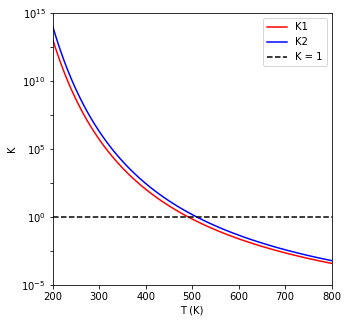

In [6]:
DG1  = -3.72      #kcal/mol
DG2  = -4.49      #kcal/mol
DH1  = -20.1      #kcal/mol
DH2  = -21.0      #kcal/mol
DCP1 =  8.20e-4   #kcal/mol/K
DCP2 = 1.48e-3    #kcal/mol/K
R    = 1.987e-3   #kcal/mol/K
T0   = 400        #K Ref temperature where we have K0 calculated.
TR   = 400        #K Technically, ref temperature for DH can be different from T0, the ref. temp. for K0.
T    = np.linspace(200, 800, 100) #K
K10  = np.exp(-DG1/R/T0)
K20  = np.exp(-DG2/R/T0)

#The long messy integrated form of the van't Hoff equation
K1 = K10*np.exp(-(DH1 - DCP1*TR)/R*(1/T - 1/T0) + DCP1/R*np.log(T/T0))
K2 = K20*np.exp(-(DH2 - DCP2*TR)/R*(1/T - 1/T0) + DCP2/R*np.log(T/T0))

plt.figure(figsize = (5,5))
plt.plot(T, K1, color = 'red', label = 'K1')
plt.plot(T, K2, color = 'blue', label = 'K2')
plt.hlines(1, 200, 800, color = 'black', linestyle = 'dashed', label = 'K = 1')
plt.yscale('log')
plt.ylabel('K')
plt.ylim(10**-5, 10**15)
plt.yticks(10**np.linspace(-5, 15, 9))
plt.xlabel('T (K)')
plt.xlim(T[0], T[-1])
plt.legend()

In [7]:
print(f'At 600K, K1 = {K1[T == 600][0]:0.3E} and K2 = {K2[T == 600][0]:0.3E}')

At 600K, K1 = 2.424E-02 and K2 = 4.486E-02


### Temperature Effects on Reaction Equilibrium

We can similarly adapt our objective function so that it accounts for temperature effects:

In [8]:
def EQ7(var):
    
    ex1 = var[0]
    ex2 = var[1]
    
    DG1  = -3.72      #kcal/mol
    DG2  = -4.49      #kcal/mol
    DH1  = -20.1; #kcal/mol
    DH2  = -21.0; #kcal/mol
    DCP1 =  8.20e-4; #kcal/mol/K
    DCP2 = 1.48e-3; #kcal/mol/K
    R    = 1.987e-3   #kcal/mol/K
    T0   = 400        #K, reference temp for K0
    TR   = 400        #K, reference temp for DH
    T    = 600        #K, actual reaction temperature
    P    = 1875.16    #Torr
    P    = P/750      #convert to bar
    P0   = 1          #bar
    NA0  = 1          #mole
    NB0  = 1          #mole
    NC0  = 0          #moles
    ND0  = 0          #moles
    
    NA  = NA0 - ex1 - ex2
    NB  = NB0 - ex1 - ex2
    NC  = NC0 + ex1
    ND  = ND0       + ex2
    
    NT  = NA + NB + NC + ND
    
    yA  = NA/NT
    yB  = NB/NT
    yC  = NC/NT
    yD  = ND/NT

    aA  = yA*P/P0
    aB  = yB*P/P0
    aC  = yC*P/P0
    aD  = yD*P/P0
    
    K1A = aC/aA/aB
    K2A = aD/aA/aB
    
    K10  = np.exp(-DG1/R/T0)
    K20  = np.exp(-DG2/R/T0)

    #The long messy integrated form of the van't Hoff equation
    K1 = K10*np.exp(-(DH1 - DCP1*TR)/R*(1/T - 1/T0) + DCP1/R*np.log(T/T0))
    K2 = K20*np.exp(-(DH2 - DCP2*TR)/R*(1/T - 1/T0) + DCP2/R*np.log(T/T0))    

    LHS1 = K1 - K1A
    LHS2 = K2 - K2A
    
    return [LHS1, LHS2]

After this, it is basically the same as above.  All we really did was change the numerical value of K1 and K2 from thermo...otherwise, it is identical to the solution for EQ6, we just make it easy to solve the equilibrium problem at any temperature here.

In [9]:
var0 = np.array([0.2, 0.6])
ans  = opt.root(EQ7, var0)
ans

    fjac: array([[-0.99675202, -0.08053206],
       [ 0.08053206, -0.99675202]])
     fun: array([ 4.24660307e-15, -8.22258928e-15])
 message: 'The solution converged.'
    nfev: 19
     qtf: array([-5.83769433e-13, -2.41806359e-12])
       r: array([0.9440433 , 0.11991682, 0.96596767])
  status: 1
 success: True
       x: array([0.02687147, 0.04971806])

In [10]:
#Now a bit of post processing that solution to get the requested compositions:
e1  = ans.x[0]
e2  = ans.x[1]

NA0 = 1          #mole
NB0 = 1          #mole
NC0 = 0          #moles
ND0 = 0          #moles

NA  = NA0 - e1 - e2
NB  = NB0 - e1 - e2
NC  = NC0 + e1
ND  = ND0      + e2

NT  = NA + NB + NC + ND

yA  = NA/NT
yB  = NB/NT
yC  = NC/NT
yD  = ND/NT

print(f'The mole fractions of A, B, C, and D are {yA:0.3f}, {yB:0.3f}, {yC:0.3f}, and {yD:0.3f}')

The mole fractions of A, B, C, and D are 0.480, 0.480, 0.014, and 0.026
